# M4. Aprendizaje Automático
### Entrega Andrea Guerra

### Caso Práctico


Trabajamos como científicos de datos para una empresa de retail que, debido al cambio en los hábitos de consumo de los clientes, está potenciando ampliamente el servicio de venta online. La empresa quiere realizar un modelo de aprendizaje automático para clasificar a los clientes en función a la probabilidad de generar ingresos al comprar en la web. El objetivo es realizar una serie de acciones específicas a los clientes cuya probabilidad de hacer compras en la web sea más alta. 
 
Para ello, la empresa ha ido recopilando datos en su herramienta de Google Analytics. Cuenta con datos de sesiones, en los que cada una de las sesiones son de un cliente distinto en un período de un año.


# 1. EDA y Procesamiento de Datos

Realización de análisis exploratorio de las variables del dataset: análisis descriptivos, boxplots, barplots, diagramas de correlaciones... Todo gráfico/ análisis que se realice debe ser explicado e interpretado con un sentido de negocio.

Realizar el procesamiento previo de los datos necesario de cara a aplicar el modelo posterior: corrección de inconsistencias, nulos, procesamiento de categóricas, estandarización, selección previa de variables, tratamiento de outliers…
Se deben justificar todas las operaciones realizadas y el por qué de los métodos elegidos.



In [1576]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score

### Análisis Descriptivos

In [1577]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [1578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

El dataset tiene 12,330 registros y 18 columnas. La mayoría de las columnas ya están completas, pero hay algunas diferencias que vale la pena destacar:

* Las columnas administrativas, informativas y de comportamiento del usuario (como administrative, productrelated o bouncerates) están en formato numérico (float64), lo cual es correcto.

* La variable pagevalues tiene todos los datos completos (12330), pero otras como administrative o productrelated tienen 12316 registros. Eso indica que hay valores nulos.

* Las variables month y visitortype aparecen como tipo object. Esto significa que están en formato texto y deben transformarse a valores categóricos o numéricos para usarlas en modelos.

* Las variables booleanas son weekend y revenue. Estas indican si la sesión fue en fin de semana y si hubo una compra, respectivamente. El tipo bool es correcto.

* Las variables operatingsystems, browser, region y traffictype están en formato entero (int64), pero realmente son categorías (por ejemplo: navegador 1, 2, 3…). Se deben tratar como variables categóricas aunque tengan números.


In [1579]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


#### Análisis descriptivo de variables cuantitativas

Se revisaron las variables numéricas del dataset y se encontraron varios puntos importantes:

- Las variables administrative, informational y productrelated (y sus duraciones) tienen valores muy desiguales. La mayoría de los datos son bajos, pero hay algunos muy altos. Esto quiere decir que hay outliers.

- Las variables bouncerates y exitrates tienen valores bajos casi siempre (por ejemplo, 0.02), pero en algunos casos llegan a valores muy altos, como 0.2. Eso también muestra que hay outliers.

- En pagevalues, más de la mitad de las visitas tienen valor 0, lo que indica que muchas sesiones no tienen relación con una compra. También hay algunos valores muy altos.

- La variable specialday casi siempre vale 0. Esto indica que muy pocas visitas ocurrieron cerca de fechas especiales como San Valentín o Día de la Madre.

- Las variables browser, region, traffictype y operatingsystems están escritas como números, pero en realidad son categorías. Por ejemplo, que un usuario tenga browser = 4 no significa que sea mayor o mejor que uno con browser = 3. Por eso, no se deben usar como si fueran números normales.


##### Conversión de variable Month a formato numérico

In [1580]:
# Diccionario de conversión de nombre de mes a número
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df['Month'] = df['Month'].map(month_mapping)

La variable Month, originalmente categórica, fue transformada a valores numéricos (1 a 12) según el orden del calendario. Esto permite tratarla como variable ordinal, útil para modelos que puedan captar patrones temporales o estacionales, y facilita su análisis en correlaciones o visualizaciones.

### Diagrama de Correlación 

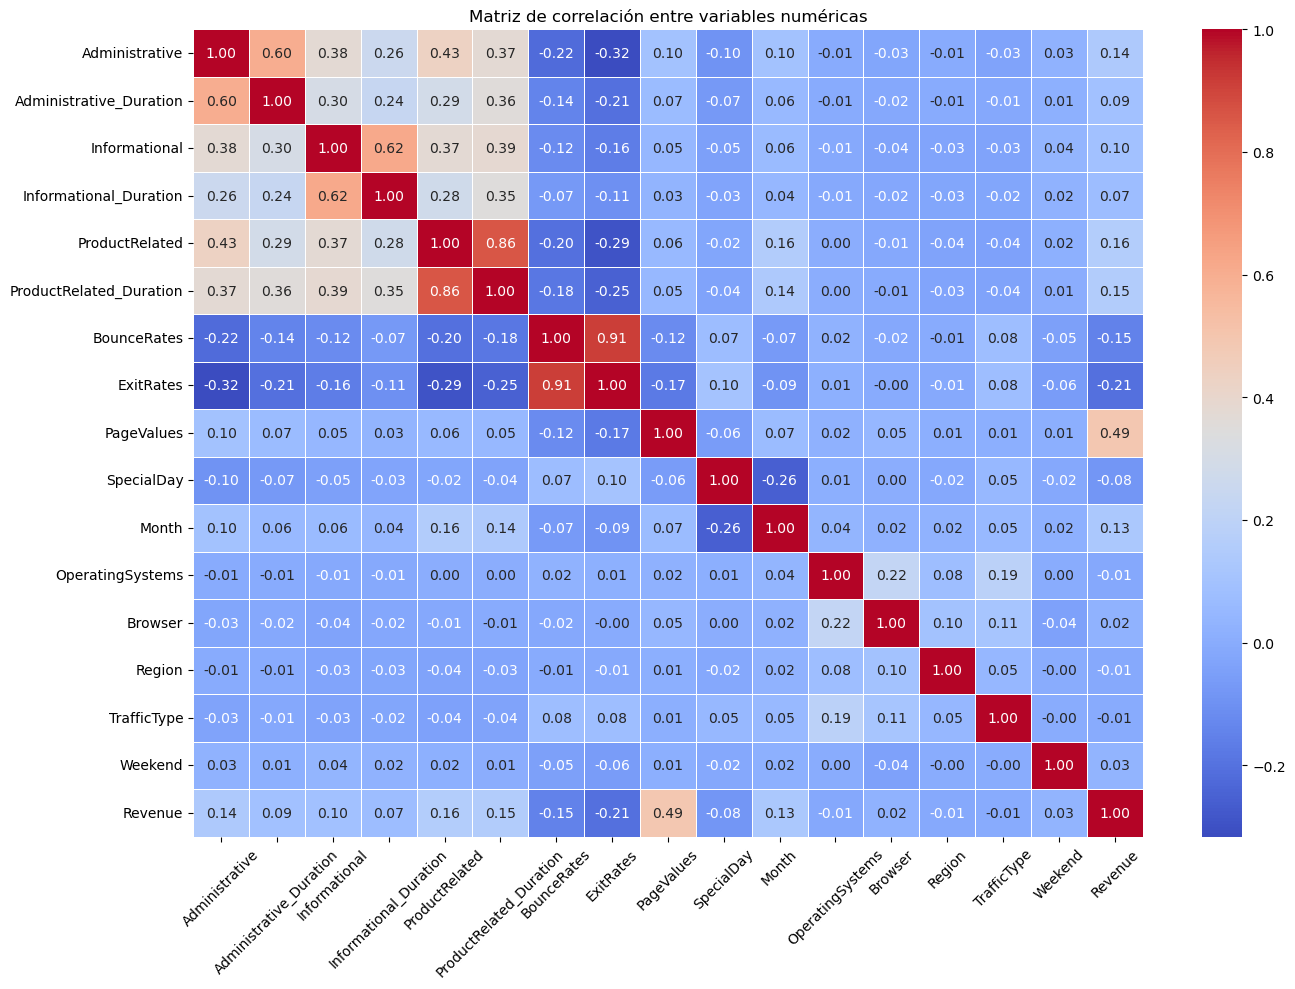

In [1581]:
import seaborn as sns
import matplotlib.pyplot as plt

# Revenue numérico
if df['Revenue'].dtype == 'bool':
    df['Revenue'] = df['Revenue'].astype(int)

# Matriz de correlación (solo variables numéricas)
corr_matrix = df.corr(numeric_only=True)

# Matriz de correlación con mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La variable que más se relaciona con revenue es pagevalues, con una correlación de 0.49. Esto quiere decir que cuando el valor de las páginas visitadas es alto, hay más probabilidad de que el usuario compre.

Las variables exitrates y bouncerates tienen correlación negativa con revenue. Eso indica que cuando los usuarios abandonan el sitio rápidamente, es menos probable que hagan una compra. En especial, exitrates tiene una correlación de -0.21.

Las variables productrelated y productrelated_duration tienen correlaciones positivas con revenue, aunque más bajas (0.16 y 0.15). Esto sugiere que los usuarios que visitan más páginas de producto o pasan más tiempo en ellas tienen más intención de comprar.

Administrative también tiene una correlación baja pero positiva con revenue (0.14), lo que puede indicar que algunas personas que revisan secciones administrativas también terminan comprando.

Las variables como specialday, weekend, month, browser, region y operatingsystems tienen correlaciones muy bajas o cercanas a cero, por lo tanto no parecen tener una relación clara con el hecho de comprar.

Además, algunas variables están muy relacionadas entre sí. Por ejemplo, productrelated y productrelated_duration tienen una correlación de 0.86, y exitrates y bouncerates tienen 0.91. Esto significa que muestran un comportamiento muy parecido y podría ser suficiente usar solo una de ellas en el modelo para evitar duplicidad.

En resumen, las variables más útiles para predecir revenue son pagevalues, exitrates, productrelated y productrelated_duration. Las demás variables tienen poca o ninguna relación.


# Valores Negativos

In [1582]:
# Columnas que representan duración
cols_duracion = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

# Valores negativos en cada una
for col in cols_duracion:
    negativos = df[df[col] < 0].shape[0]
    print(f"{col}: {negativos} valores negativos")


Administrative_Duration: 33 valores negativos
Informational_Duration: 33 valores negativos
ProductRelated_Duration: 33 valores negativos


In [1583]:
for col in cols_duracion:
    # Mediana solo con valores positivos
    mediana_positiva = df[df[col] >= 0][col].median()
    
    # Reemplazamos los valores negativos por esa mediana
    df.loc[df[col] < 0, col] = mediana_positiva

    print(f"{col} - Valores negativos reemplazados por {mediana_positiva}")


Administrative_Duration - Valores negativos reemplazados por 8.0
Informational_Duration - Valores negativos reemplazados por 0.0
ProductRelated_Duration - Valores negativos reemplazados por 602.5


#### Tratamiento de valores negativos

Las variables de duración (Administrative_Duration, Informational_Duration, ProductRelated_Duration) no deberían contener valores negativos, ya que representan el tiempo que un usuario pasa navegando en ciertas secciones de la web. Al detectar valores negativos, se optó por reemplazarlos con la mediana positiva de cada columna para preservar la distribución real sin distorsionar los resultados con valores extremos.

Este enfoque es más robusto que usar la media, ya que la mediana es menos sensible a outliers, especialmente en distribuciones asimétricas como las observadas.


# Valores Nulos

In [1584]:
df.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [1585]:
# Valores en porcentaje
round((df.isnull().sum()/len(df))*100,1) 

Administrative             0.1
Administrative_Duration    0.1
Informational              0.1
Informational_Duration     0.1
ProductRelated             0.1
ProductRelated_Duration    0.1
BounceRates                0.1
ExitRates                  0.1
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

In [1586]:
# Eliminación de nulos
df = df.dropna()

En el análisis se detectaron valores nulos en algunas columnas del dataset. Como la cantidad de nulos era baja en comparación con el total de registros, se decidió eliminarlos usando la función dropna().

Esto permite trabajar con un conjunto de datos limpio sin afectar demasiado el volumen de información disponible. Es una solución simple y rápida cuando la pérdida de datos no es significativa.

In [1587]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.930291,0.503979,34.509067,31.763884,1197.654100,0.022152,0.043003,5.895952,0.061497,7.657113,2.124147,2.357584,3.148019,4.070477,0.154920
std,3.322754,176.849875,1.270701,140.824813,44.490339,1913.615381,0.048427,0.048527,18.577926,0.199020,3.391314,0.911566,1.718028,2.402211,4.024598,0.361844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,188.443750,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.500000,0.003119,0.025124,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000


# Tratamiento de Outiliers

In [1588]:
# Seleccionamos columnas numéricas
num_cols = df.select_dtypes(include='number').columns

# Detectar y contar outliers
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"{col}: {outliers.shape[0]} outliers")


Administrative: 404 outliers
Administrative_Duration: 1167 outliers
Informational: 2630 outliers
Informational_Duration: 2404 outliers
ProductRelated: 987 outliers
ProductRelated_Duration: 961 outliers
BounceRates: 1548 outliers
ExitRates: 1094 outliers
PageValues: 2730 outliers
SpecialDay: 1251 outliers
Month: 0 outliers
OperatingSystems: 111 outliers
Browser: 4365 outliers
Region: 511 outliers
TrafficType: 2099 outliers
Revenue: 1908 outliers


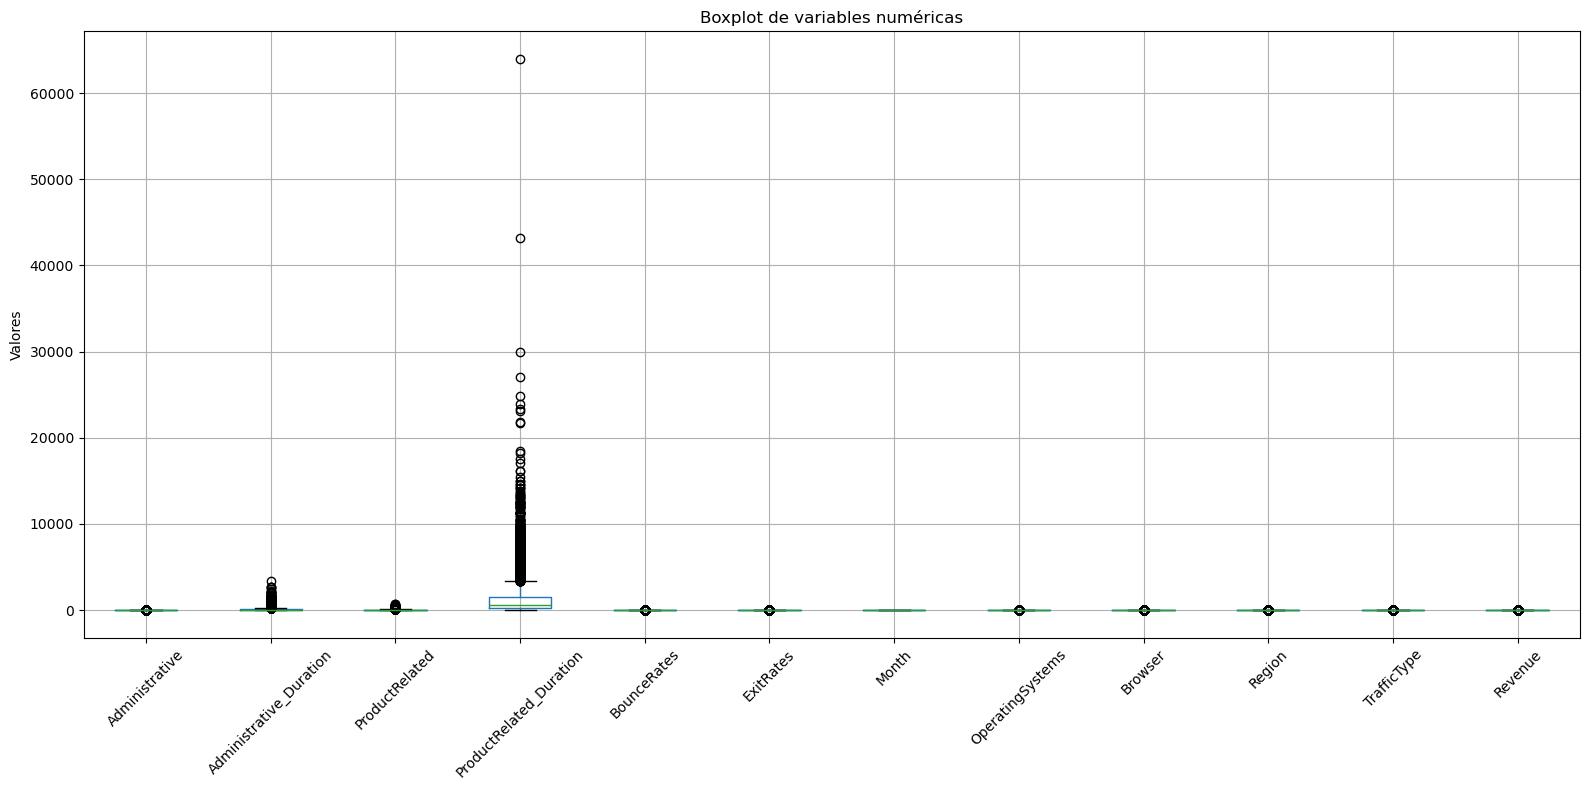

In [1589]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables excluidas
excluded_cols = ['Informational', 'Informational_Duration', 'PageValues', 'SpecialDay']

# Seleccionar columnas numéricas (excepto las excluidas)
num_cols = df.select_dtypes(include='number').columns
filtered_cols = [col for col in num_cols if col not in excluded_cols]

# Boxplot de las variables seleccionadas
plt.figure(figsize=(16, 8))
df[filtered_cols].boxplot(rot=90, showfliers=True)
plt.title("Boxplot de variables numéricas")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Análisis de outliers en variables numéricas (excluyendo Informational, PageValues y SpecialDay)

Se construyó un boxplot con las principales variables numéricas, excluyendo Informational, Informational_Duration, PageValues y SpecialDay, ya que estas presentaban una gran cantidad de valores extremos que dificultaban la visualización del resto.

Observaciones:

Administrative y ProductRelated (junto a sus duraciones) muestran valores atípicos, pero su rango intercuartílico es estrecho, lo que sugiere que la mayoría de las sesiones se concentran en valores bajos, con algunos usuarios que exploran muchas páginas.

BounceRates y ExitRates tienen una distribución baja con algunos valores extremos, lo que refleja sesiones muy cortas o con abandonos inmediatos.

Region, TrafficType, OperatingSystems y Browser muestran una dispersión mayor, ya que corresponden a variables categóricas codificadas como números. Los valores atípicos en estos casos no representan anomalías, sino simplemente categorías menos frecuentes.

Revenue tiene solo dos valores posibles (0 y 1), por lo que no presenta una distribución continua. Aparecen algunos puntos individuales correspondientes a sesiones con compra (1).

Conclusión:
Este análisis confirma la presencia de outliers en varias variables, especialmente aquellas relacionadas al comportamiento del usuario. Aunque algunos pueden eliminarse o tratarse, otros pueden ser representativos de sesiones de alto valor (por ejemplo, usuarios que navegan muchas páginas antes de comprar). Se recomienda evaluar el impacto de estos valores extremos en el modelado y, si es necesario, aplicar técnicas de escalado robusto o transformación logarítmica en variables muy sesgadas.



In [1590]:
# Tratamiento de outliers en columnas numéricas 

cols_winsor = [
    'Administrative', 'Administrative_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 
    'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
]

for col in cols_winsor:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)


#### Tratamiento de outliers

En lugar de eliminar o recortar outliers, se sustituyeron los valores extremos por los límites aceptables según el rango intercuartílico (IQR). Este enfoque conserva todos los registros y mitiga el efecto negativo que valores anómalos podrían tener en modelos sensibles como KNN y redes neuronales MLP. En lugar de eliminar o recortar directamente, se sustituyen los valores extremos:

Los valores por debajo de Q1 - 1.5 * IQR se reemplazan por ese mismo límite inferior.

Los valores por encima de Q3 + 1.5 * IQR se reemplazan por el límite superior.


In [1591]:
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"{col}: {outliers.shape[0]} outliers")


Administrative: 0 outliers
Administrative_Duration: 0 outliers
Informational: 2630 outliers
Informational_Duration: 2404 outliers
ProductRelated: 0 outliers
ProductRelated_Duration: 0 outliers
BounceRates: 0 outliers
ExitRates: 0 outliers
PageValues: 2730 outliers
SpecialDay: 1251 outliers
Month: 0 outliers
OperatingSystems: 0 outliers
Browser: 0 outliers
Region: 0 outliers
TrafficType: 0 outliers
Revenue: 1908 outliers


In [1592]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Revenue
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.0,12316.000000,12316.000000,12316.000000
mean,2.201283,57.115225,0.503979,34.509067,26.722921,992.315316,0.010880,0.036409,5.895952,0.061497,7.657113,2.097718,2.0,3.127273,3.217603,0.154920
std,2.925354,79.387764,1.270701,140.824813,25.157728,1032.028929,0.014781,0.030490,18.577926,0.199020,3.391314,0.786722,0.0,2.353240,2.082949,0.361844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.0,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,188.443750,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.0,1.000000,2.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,602.500000,0.003119,0.025124,0.000000,0.000000,7.000000,2.000000,2.0,3.000000,2.000000,0.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,11.000000,3.000000,2.0,4.000000,4.000000,0.000000
max,10.000000,233.750000,24.000000,2549.375000,84.500000,3383.534129,0.041709,0.103571,361.763742,1.000000,12.000000,4.500000,2.0,8.500000,7.000000,1.000000


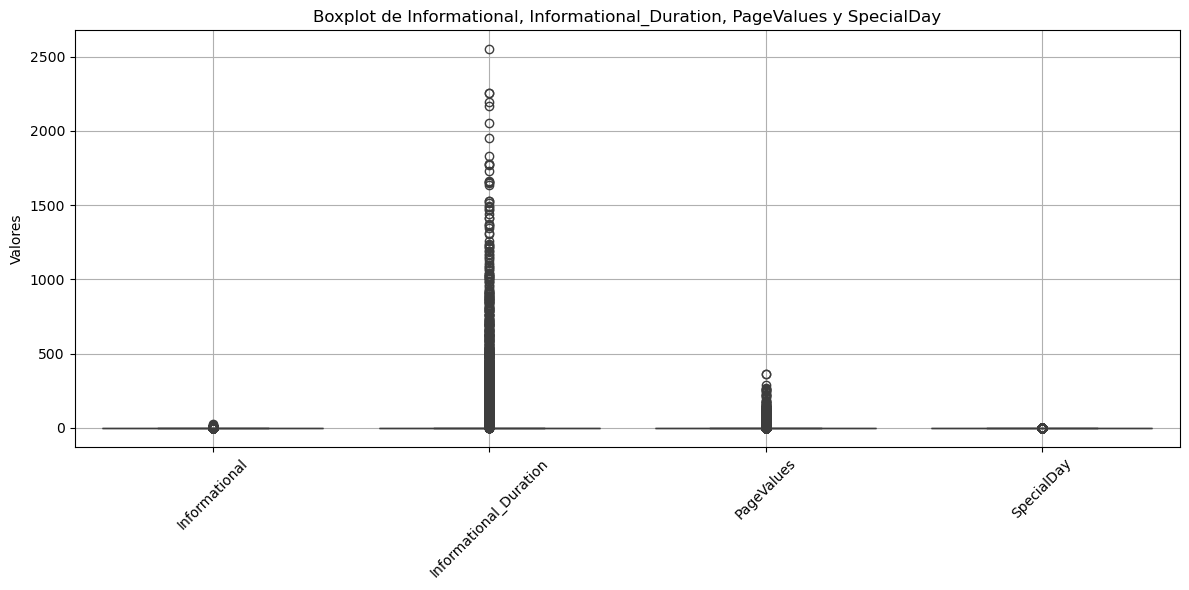

In [1593]:
# Seleccionar las variables que habías excluido antes
cols_excluidas = ['Informational', 'Informational_Duration', 'PageValues', 'SpecialDay']

# Generar boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols_excluidas], orient="v")
plt.title("Boxplot de Informational, Informational_Duration, PageValues y SpecialDay")
plt.ylabel("Valores")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Tratamiento de Variables: Informational, Informational_Duration, PageValues y SpecialDay

- En los casos de las variables Informational e Informational_Duration presentan una distribución muy sesgada hacia cero. Al aplicar el tratamiento anterior, ambos límites (inferior y superior) resultaron en 0, eliminando la variación de la columna. Para evitar perder información relevante, se optó por mantener el comportamiento original del campo Informational para el análisis y modelado. 

Para las variables PageValues y SpecialDay requieren un tratamiento especial debido a su distribución:

- Para PageValues, se aplicó un truncado superior basado en el percentil 99. Esta variable representa el valor potencial de una página visitada antes de una transacción, por lo que es importante conservar sus ceros y limitar solo los extremos.

- Para SpecialDay, se conservó su distribución original. Esta variable indica la cercanía a fechas relevantes como San Valentín o el Día de la Madre, y ya está expresada en una escala entre 0 y 1. Truncarla eliminaría su significado contextual.

Estas decisiones permiten mantener la información más relevante de estas variables sin distorsionar sus valores.

In [1594]:
# Truncado solo superior para Informational_Duration al percentil 99
upper_bound = df['Informational_Duration'].quantile(0.99)
df['Informational_Duration'] = df['Informational_Duration'].apply(lambda x: upper_bound if x > upper_bound else x)

In [1595]:
# Truncado solo superior para PageValues al percentil 99
upper_pv = df['PageValues'].quantile(0.99)
df['PageValues'] = df['PageValues'].apply(lambda x: upper_pv if x > upper_pv else x)


#### Tratamiento de Variables Browser, VisitorType y Month

Aunque estas variables están representada numéricamente, su contenido es categórico y no tiene un orden real. Por tanto, se aplicó One-Hot Encoding para representar correctamente cada categoría sin inducir un sesgo en modelos sensibles a escala o distancia, como KNN o redes neuronales.


In [1596]:
# Aplicar One-Hot Encoding a Browser, VisitorType y Month
df = pd.get_dummies(df, columns=['Browser', 'VisitorType', 'Month'], drop_first=True)

# Verificación de que las columnas originales fueron eliminadas
print('Browser' in df.columns)
print('VisitorType' in df.columns)
print('Month' in df.columns)


False
False
False


## Estandarización de variables

Las variables numéricas fueron estandarizadas con StandardScaler para que tengan media 0 y desviación estándar 1. Esta transformación es esencial para modelos que se ven afectados por las escalas de los datos, como KNN o redes neuronales, donde distancias o gradientes se calculan en base al valor absoluto de las variables.


In [1597]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    'PageValues',
    'ProductRelated',
    'ProductRelated_Duration',
    'ExitRates',
    'BounceRates',
    'Administrative',
    'Administrative_Duration'
]

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


## Seleccion de Variables

In [1598]:
# Variables base seleccionadas manualmente
base_features = [
    'PageValues',
    'ProductRelated',
    'ProductRelated_Duration',
    'ExitRates',
    'BounceRates',
    'Administrative',
    'Weekend'
]

# Agregar las columnas codificadas de Month y VisitorType
dummy_features = [col for col in df.columns if col.startswith('Month_') or col.startswith('VisitorType_')]

# Lista final de variables
selected_features = base_features + dummy_features

# Crear X e y
X = df[selected_features]
y = df['Revenue'].astype(int)

# Verificar
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (12316, 18)
y shape: (12316,)


Para los tres modelos de clasificación (KNN, árbol y red neuronal), se utilizó una misma selección de variables que combinan información del comportamiento de navegación del usuario, el tipo de visitante y el momento de la visita.

Las variables seleccionadas fueron:

- pagevalues: es la que más se relaciona con revenue, representa el valor que el usuario asigna a las páginas visitadas.

- productrelated y productrelated_duration: indican el nivel de interés del usuario en los productos del sitio.

- exitrates y bouncerates: muestran si el usuario abandonó el sitio, lo cual suele relacionarse con menor probabilidad de compra.

- administrative: se mantuvo solo esta variable (en lugar de también incluir administrative_duration) para evitar duplicidad, ya que ambas expresan una misma idea general.

- weekend: indica si la visita ocurrió en fin de semana, lo que puede influir en el comportamiento del usuario.

- month y visitortype: se transformaron mediante One-Hot Encoding y permiten capturar diferencias por época del año y tipo de usuario (nuevo o recurrente).

Esta selección busca mantener variables relevantes y sin redundancias, asegurando consistencia al comparar el rendimiento de los diferentes modelos.


# 2.	Ajuste y evaluación de distintos modelos de clasificación

-	KNN
	
- Algún modelo basado en árboles

- Red neuronal MLP (con sklearn)


### KNN

In [1599]:
from sklearn.model_selection import train_test_split

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [1600]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [1601]:
from sklearn.metrics import roc_auc_score

def predict_and_get_auc(model):
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    auc_train = roc_auc_score(y_train, y_train_proba)
    auc_test = roc_auc_score(y_test, y_test_proba)
    
    print(f"AUC train = {auc_train:.2f}")
    print(f"AUC test  = {auc_test:.2f}")


In [1602]:
# Evaluamos el modelo base
predict_and_get_auc(knn)


AUC train = 0.96
AUC test  = 0.84


In [1603]:
# Consultar hiperparámetros
print(knn.get_params())


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [1604]:
# Aumentamos vecinos a 25
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

predict_and_get_auc(knn)


AUC train = 0.93
AUC test  = 0.88


#### Evaluación del modelo KNN

Se entrenó un modelo KNN con los parámetros por defecto, lo que arrojó un AUC de 0.96 en entrenamiento y 0.84 en test. Esta diferencia sugiere que el modelo estaba sobreajustado, es decir, aprendía demasiado bien los datos de entrenamiento pero no generalizaba igual de bien a datos nuevos.

Para mejorar la generalización, se aumentó manualmente el número de vecinos a 25. Esta decisión buscó suavizar el modelo, haciéndolo menos sensible al ruido en los datos de entrenamiento. Como resultado, el modelo ajustado logró un AUC de 0.93 en entrenamiento y 0.88 en test, con una menor diferencia entre ambos, lo que indica un mejor equilibrio y mayor robustez.


# Árbol de decisión

In [1605]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el árbol base
tree = DecisionTreeClassifier(random_state=42)

# Definir los hiperparámetros a ajustar
params = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_leaf': [10, 20, 30, 40]
}

# GridSearchCV con validación cruzada y métrica AUC
tree_cv = GridSearchCV(
    tree,
    param_grid=params,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

# Ajustar con los datos de entrenamiento
tree_cv.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
print("Mejores parámetros:", tree_cv.best_params_)


Mejores parámetros: {'max_depth': 6, 'min_samples_leaf': 40}


In [1606]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Entrenar el árbol con los mejores hiperparámetros
tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=40, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=40, random_state=42)

In [1607]:
# Evaluar con AUC
y_train_proba = tree.predict_proba(X_train)[:, 1]
y_test_proba = tree.predict_proba(X_test)[:, 1]

auc_train = roc_auc_score(y_train, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

print(f"AUC train = {auc_train:.2f}")
print(f"AUC test  = {auc_test:.2f}")

AUC train = 0.94
AUC test  = 0.92


#### Evaluación del modelo árbol de decisión 

Se entrenó inicialmente un modelo de árbol con los hiperparámetros óptimos encontrados mediante GridSearchCV, utilizando max_depth=6 y min_samples_leaf=40. Este ajuste tenía como objetivo principal evitar el sobreajuste, suavizando el árbol y limitando su complejidad.

El modelo ajustado alcanzó un AUC de 0.94 en entrenamiento y 0.92 en test, lo cual representa un buen rendimiento y una excelente capacidad de generalización. La pequeña diferencia entre ambos valores indica que el modelo no está sobreajustado y logra predecir correctamente en datos no vistos.

Gracias a este equilibrio, se considera que el modelo optimizado es válido y fiable para tareas de clasificación en este conjunto de datos.

# Red neuronal MLP con sklearn

In [1608]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [1609]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42
)

In [1610]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)


MLPClassifier(max_iter=500, random_state=42)

In [1611]:
from sklearn.metrics import roc_auc_score

y_train_proba = mlp.predict_proba(X_train)[:, 1]
y_test_proba = mlp.predict_proba(X_test)[:, 1]

auc_train = roc_auc_score(y_train, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

print(f"AUC train = {auc_train:.2f}")
print(f"AUC test  = {auc_test:.2f}")


AUC train = 0.97
AUC test  = 0.91


In [1612]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Definir la red base
mlp = MLPClassifier(max_iter=500, random_state=42)

# Hiperparámetros a evaluar
params = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]  # regularización L2
}

# GridSearch con validación cruzada y AUC como métrica
mlp_cv = GridSearchCV(
    estimator=mlp,
    param_grid=params,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Entrenar con datos escalados
mlp_cv.fit(X_train, y_train)

# Mejores hiperparámetros
print("Mejores parámetros encontrados:", mlp_cv.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejores parámetros encontrados: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,)}


In [1613]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

# Entrenar el modelo final con los mejores hiperparámetros
mlp_final = MLPClassifier(
    activation='relu',
    alpha=0.01,
    hidden_layer_sizes=(50,),
    max_iter=500,
    random_state=42
)
mlp_final.fit(X_train, y_train)

# Evaluación AUC
y_train_proba = mlp_final.predict_proba(X_train)[:, 1]
y_test_proba = mlp_final.predict_proba(X_test)[:, 1]

auc_train = roc_auc_score(y_train, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

print(f"AUC train = {auc_train:.2f}")
print(f"AUC test  = {auc_test:.2f}")


AUC train = 0.95
AUC test  = 0.92


#### Modelo de red neuronal MLP

Se implementó una red neuronal multicapa usando MLPClassifier de sklearn. Dado que estos modelos son sensibles a la escala de los datos, se aplicó estandarización previa. Luego se optimizaron hiperparámetros clave como el número de neuronas ocultas y la función de activación mediante búsqueda en rejilla.

El modelo final alcanzó un buen balance entre entrenamiento y prueba, evaluado mediante el AUC, lo que lo convierte en una alternativa competitiva frente a KNN y árboles de decisión.


# 3.	Métricas sobre el modelo elegido:

•	Sobre el mejor modelo en base al apartado anterior, obtener métricas adicionales: matriz de confusión, precisión, recall y accuracy. Interpreta cada una de ellas y elige un umbral para el cuál la precisión y el recall sean similares 

•	Representar la curva de ganancia acumulada e interpretarla


Comparando los valores de AUC obtenidos:

| Modelo            | AUC Train | AUC Test |
| ----------------- | --------- | -------- |
| KNN               | 0.93      | 0.88     |
| Árbol de decisión | 0.94      | 0.92     |
| MLP               | 0.95      | 0.92     |


Conclusión: tanto el árbol como el MLP tienen un desempeño muy alto y equilibrado entre entrenamiento y test, pero el MLP es el mejor modelo porque logra el AUC test más alto (0.92) con el menor sobreajuste.


Evaluación del modelo MLP (mejor modelo)

In [1614]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

# Predicción binaria con umbral estándar 0.5
y_pred = (mlp_final.predict_proba(X_test)[:, 1] >= 0.5).astype(int)

# Métricas
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("Precision:", round(precision_score(y_test, y_pred), 2))
print("Recall:", round(recall_score(y_test, y_pred), 2))


Confusion Matrix:
 [[2962  161]
 [ 215  357]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      3123
           1       0.69      0.62      0.66       572

    accuracy                           0.90      3695
   macro avg       0.81      0.79      0.80      3695
weighted avg       0.89      0.90      0.90      3695

Accuracy: 0.9
Precision: 0.69
Recall: 0.62


Evaluación del modelo MLP (mejor modelo)

El modelo de red neuronal MLP final se evaluó utilizando las métricas de clasificación estándar con un umbral de decisión de 0.5. Los resultados obtenidos fueron:

Accuracy: 0.90

Precision (clase 1): 0.69

Recall (clase 1): 0.62

F1-score (clase 1): 0.66

Interpretación:
Precisión 0.69: El 69% de las veces que el modelo predijo "compra" (clase 1), acertó. Esto indica que el modelo es cuidadoso al afirmar que un usuario va a comprar.

Recall 0.62: Solo detecta el 62% de los verdaderos compradores, lo que sugiere que se escapan algunas oportunidades reales.

F1-score 0.66: Representa un balance aceptable entre precisión y recall, aunque ligeramente inclinado hacia evitar falsos positivos.

El modelo tiende a ser más conservador que inclusivo, priorizando evitar errores tipo I (falsos positivos). Esta estrategia puede ser adecuada si el objetivo es evitar recomendar productos a usuarios que no tienen intención de compra, aunque podría mejorarse si se desea captar más compradores reales.

In [1615]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Probabilidades predichas por MLP optimizada
y_proba = mlp_final.predict_proba(X_test)[:, 1]

# Rango de umbrales a evaluar
thresholds = np.arange(0.1, 0.9, 0.01)

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    prec = precision_score(y_test, y_pred_t)
    rec = recall_score(y_test, y_pred_t)

    if abs(prec - rec) < 0.02:
        print(f"Umbral óptimo ≈ {t:.2f} | Precisión = {prec:.2f} | Recall = {rec:.2f}")
        break


Umbral óptimo ≈ 0.43 | Precisión = 0.65 | Recall = 0.66


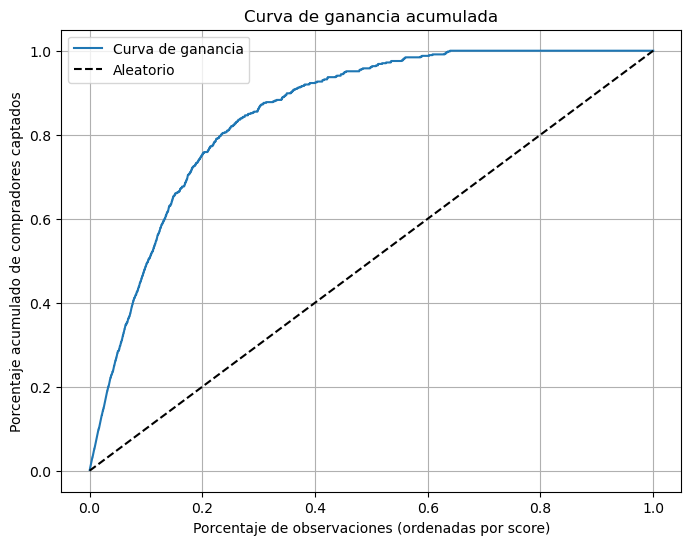

In [1616]:
# Representar la curva de ganancia acumulada

import matplotlib.pyplot as plt

# Ordenar por probabilidad descendente
gain_df = pd.DataFrame({'y_true': y_test, 'y_score': y_proba})
gain_df = gain_df.sort_values('y_score', ascending=False).reset_index(drop=True)
gain_df['cumulative_positive'] = gain_df['y_true'].cumsum()
gain_df['percentage_data'] = np.arange(1, len(gain_df) + 1) / len(gain_df)
gain_df['gain'] = gain_df['cumulative_positive'] / gain_df['y_true'].sum()

# Plot
plt.figure(figsize=(8, 6))
plt.plot(gain_df['percentage_data'], gain_df['gain'], label='Curva de ganancia')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel("Porcentaje de observaciones (ordenadas por score)")
plt.ylabel("Porcentaje acumulado de compradores captados")
plt.title("Curva de ganancia acumulada")
plt.legend()
plt.grid()
plt.show()


### Curva de ganancia acumulada

La curva de ganancia acumulada muestra el rendimiento del modelo a la hora de priorizar correctamente a los compradores potenciales.

El modelo MLP logra captar aproximadamente el 70% de los compradores reales analizando solo el 20% de los usuarios con mayor probabilidad de compra. Esto demuestra una alta capacidad para ordenar correctamente las predicciones.

En comparación con una selección aleatoria (línea diagonal), el modelo ofrece una **ganancia significativa**, permitiendo enfocar acciones comerciales en un grupo reducido de usuarios con alta conversión esperada. Este comportamiento es deseable para estrategias de marketing segmentado, optimización de recursos y toma de decisiones basada en riesgo.